# Final Project Dataset Investigation

Problem: 
Identify whether patient has diabetes or not and what type.
Is it possible to use a classification model to predict this? 

In [38]:
from sklearn import (
    linear_model, 
    preprocessing,
    model_selection,
    metrics, 
    tree, 
    neighbors, 
    naive_bayes)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [39]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# removing extraneous features to decrease complexity
data = data.drop(columns=[
    'AnyHealthcare',
    'NoDocbcCost',
    'GenHlth', 
    'MentHlth', 
    'PhysHlth', 
    'DiffWalk',
    'Education',
    'Income'
], axis=0)

data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0


### data is taken from 
- https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_012_health_indicators_BRFSS2015.csv

### target variable is Diabetes 
- 0 = no diabetes
- 1 = prediabetes 
    - lifestyle changes to correct 
- 2 = diabetes
    - start treating diabetes
research diabetes

### features: 21 
1. High Blood Pressure (HighBP)
    - 0 = no
    - 1 = yes
2. High Cholesterol (HighChol)
    - 0 = no
    - 1 = yes
3. Cholesterol Check within the past 5 years (CholCheck)
    - 0 = no
    - 1 = yes
4. Body Mass Index (BMI)
5. Have you smoked 100 cigarettes (5 packs) over lifetime? (Smoker)
    - 0 = no
    - 1 = yes
6. Stroke
    - 0 = no
    - 1 = yes
7. Coronary Heart Disease or Myocardial Infarction (HeartDiseaseorAttack)
    - 0 = no
    - 1 = yes
8. Physical Activity within past 30 days (not including job) (PhysActivity)
    - 0 = no
    - 1 = yes
9. Consumes Fruit >=1 times a day (Fruits)
    - 0 = no
    - 1 = yes
10. Consumes Vegetables >=1 times a day (Veggies)
    - 0 = no
    - 1 = yes
11. Heavy Drinker men >14 drinks, women >7 drinks (HvyAlcoholConsump)
    - 0 = no
    - 1 = yes
12. Health Care Coverage (AnyHealthcare)
    - 0 = no
    - 1 = yes
13. Couldn't see doctor due to cost in past 12 months (NoDocbcCost)
    - 0 = no
    - 1 = yes
14. General Health Rating (GenHlth)
    - 1 = excellent
    - 2 = very good 
    - 3 = good 
    - 4 = fair 
    - 5 = poor 
15. Number of Days Mental Health was poor within past 30 days (MentHlth)
    - 1-30
16. Number of days physical/mental health kept individual from usual activities (PhysHlth)
    - 1-30
17. Difficultly walking/climbing stairs (DiffWalk)
    - 0 = no
    - 1 = yes
18. Sex 
    - 0 = female
    - 1 = male
19. Age 
    - 1 = ages 18-24
    - 2 = ages 25-29
    - 3 = ages 30-34 
    - 4 = ages 35-39
    - 5 = ages 40-44
    - 6 = ages 45-49
    - 7 = ages 50-54
    - 8 = ages 55-59
    - 9 = ages 60-64
    - 10 = ages 65-69
    - 11 = ages 70-74
    - 12 = ages 75-79
    - 13 = 80 and older
20. Education 
    - 1 = never attended school, only kindergarden
    - 2 = grades 1-8, elementary
    - 3 = grades 9-11, some high school
    - 4 = grade 12 or GED (high school graduate)
    - 5 = College 1-3 years (Some college or technical school)
    - 6 = college >=4 years (college graduate)
    - 9 = refused
21. Income 
    - 1 = < $10,000
    - 2 = < $15,000
    - 3 = < $20,000 
    - 4 = < $25,000
    - 5 = < $35,000
    - 6 = < $50,000
    - 7 = < $75,000
    - 8 = > $75,000

In [40]:
# specify target and features 
target = np.array(data['Diabetes_012'])

features_df = data.drop(columns='Diabetes_012', axis=0)
predictors = features_df.values
features_names = features_df.columns

# dataset breakdown 
print('No Diabetes:', round(np.array([1 if x ==0 else 0 for x in target]).sum()/len(target)*100, 1), '%')
print('Prediabetes:', round(np.array([1 if x ==1 else 0 for x in target]).sum()/len(target)*100, 1), '%')
print('Diabetes:', round(np.array([1 if x ==2 else 0 for x in target]).sum()/len(target)*100, 1), '%')

No Diabetes: 84.2 %
Prediabetes: 1.8 %
Diabetes: 13.9 %


In [41]:
# split data into test and training sets 
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    predictors, 
    target, 
    test_size = 0.33, 
    random_state=0, 
    stratify=target
    )

label_binarizer = preprocessing.LabelBinarizer().fit(y_train)
class_code =  {
    'no diabetes' : 0, 
    'prediabetes' : 1,
    'diabetes' : 2
}

print('Training Dataset:')
print('No Diabetes:', round(np.array([1 if x ==0 else 0 for x in y_train]).sum()/len(y_train)*100, 1), '%')
print('Prediabetes:', round(np.array([1 if x ==1 else 0 for x in y_train]).sum()/len(y_train)*100, 1), '%')
print('Diabetes:', round(np.array([1 if x ==2 else 0 for x in y_train]).sum()/len(y_train)*100, 1), '%')

Training Dataset:
No Diabetes: 84.2 %
Prediabetes: 1.8 %
Diabetes: 13.9 %


In [42]:
# function to create confusion matrix for a model 
def eval_model(name, model, results, roc_dict, classification, showConfusionMatrix):

    # Test model with testing dataset and find accuracy 
    pred = model.predict(x_test)

    results.append({
        'name' : name, 
        'Train acc' : metrics.accuracy_score(y_true = y_train, y_pred=model.predict(x_train)),
        'Test acc' : metrics.accuracy_score(y_true = y_test, y_pred=pred),
        'Prec' : str(metrics.precision_score(y_test, pred, average=None))
    })
    
    y_test_binarized = label_binarizer.transform(y_test)
    pred_binarized = label_binarizer.transform(pred)

    fpr, tpr, _ = metrics.roc_curve(
        y_test_binarized[:, class_code[classification]], 
        pred_binarized[:, class_code[classification]])
    auc = metrics.auc(fpr, tpr)
    roc_dict[f'{name}'] = {
        'fpr':fpr, 
        'tpr':tpr, 
        'auc':auc
    }
    if showConfusionMatrix:
        # plot confusion matrix for logistic regression 
        cm = metrics.confusion_matrix(y_test, pred)
        cm_display = metrics.ConfusionMatrixDisplay(cm).plot()
        plt.title(f'{name} Confusion Matrix')
        plt.savefig(f"{name}_cm.png")

In [43]:
names = [ 
    'Decision Tree',
    'Logistic Regression',
    'K-Nearest Neighbor',
    'Gaussian Naive Bayes', 
    'Bernoulli Naive Bayes', 
    'Linear Discriminant Analysis'
]

models= [ 
    tree.DecisionTreeClassifier(criterion='gini').fit(x_train, y_train),
    linear_model.LogisticRegression(solver='saga', penalty=None).fit(x_train, y_train),
    neighbors.KNeighborsClassifier(
        n_neighbors=25,
        metric='euclidean').fit(x_train, y_train),
    naive_bayes.GaussianNB().fit(x_train, y_train), 
    naive_bayes.BernoulliNB().fit(x_train, y_train),
    LinearDiscriminantAnalysis().fit(x_train, y_train)
]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

,name,Train acc,Test acc,Prec
0,Decision Tree,0.896932,0.818551,[0.86097748 0.02711324 0.3537096 ]
1,Logistic Regression,0.843674,0.844413,[0.85412182 0. 0.5193575 ]
2,K-Nearest Neighbor,0.848863,0.843361,[0.85336021 0. 0.49957735]
3,Gaussian Naive Bayes,0.776207,0.776265,[0.90133725 0.05555556 0.33464181]
4,Bernoulli Naive Bayes,0.823764,0.823365,[0.86679683 0. 0.37565852]
5,Linear Discriminant Analysis,0.841832,0.842692,[0.8596331 0. 0.48672101]


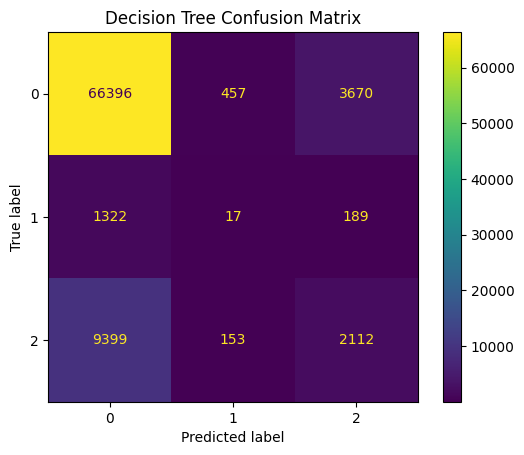

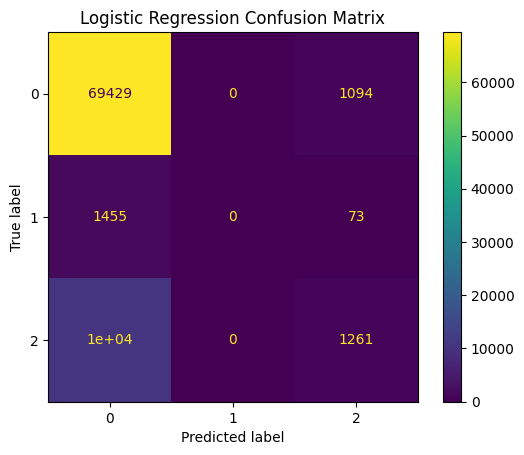

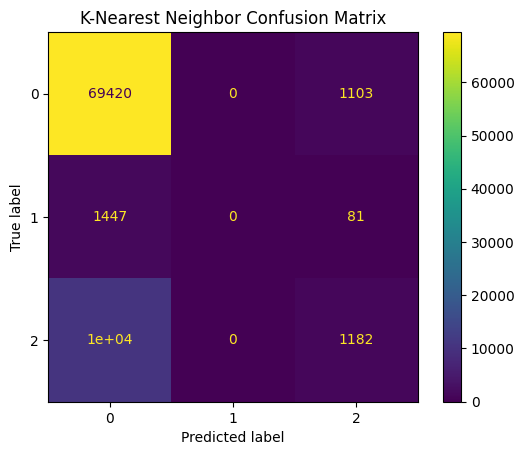

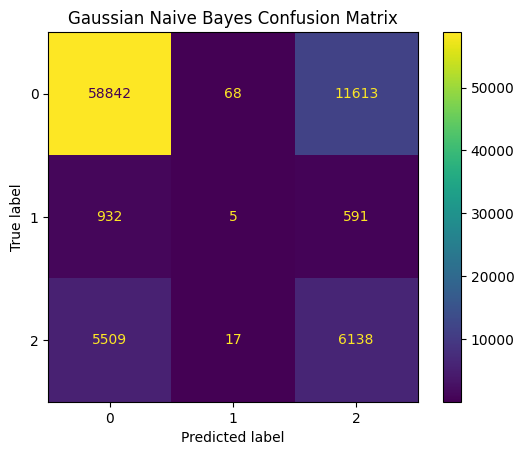

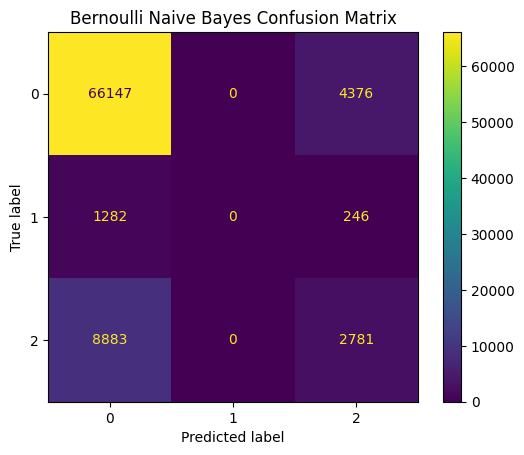

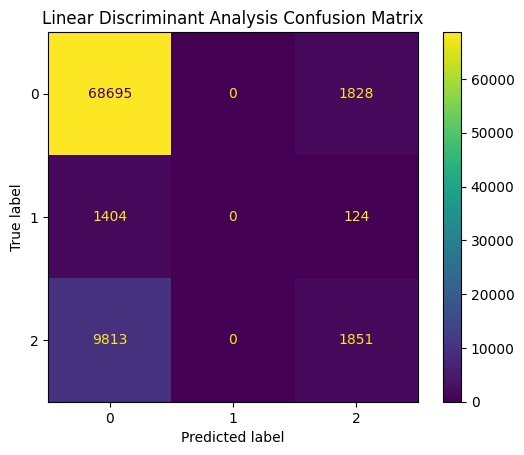

In [44]:
results_1 = []
roc_1 = {}

for i in range(len(names)):
    eval_model(
        names[i], 
        models[i], 
        results_1, 
        roc_1, 
        'no diabetes', 
        showConfusionMatrix=True
    )

noDiabetes = pd.DataFrame(results_1)
noDiabetes

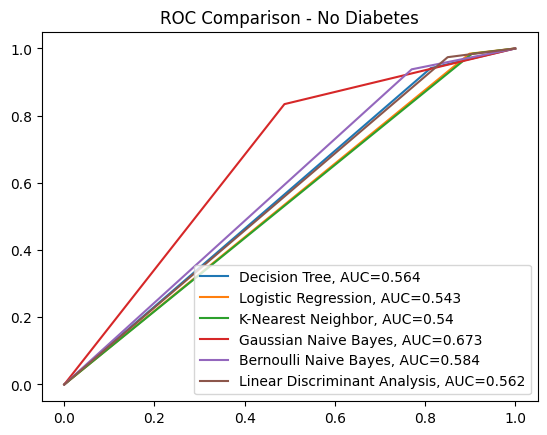

In [45]:
# create ROC curve for to compare all models 
def graph_roc_curves(name, roc_info):
    plt.figure(1).clf()
    for classifier in roc_info.keys():
        plt.plot(
            roc_info[classifier]['fpr'], 
            roc_info[classifier]['tpr'],
            label=f"{classifier}, AUC="+str(round(roc_info[classifier]['auc'],3)))

    plt.legend()
    plt.title(name)
    plt.savefig(f'{name}.png')
    plt.show()

graph_roc_curves('ROC Comparison - No Diabetes', roc_1)

In [46]:
results_2 = []
roc_2 = {}

for i in range(len(names)):
    eval_model(
        names[i], 
        models[i], 
        results_2, 
        roc_2, 
        'diabetes', 
        showConfusionMatrix=False
    )

diabetes = pd.DataFrame(results_2)
diabetes

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

,name,Train acc,Test acc,Prec
0,Decision Tree,0.896932,0.818551,[0.86097748 0.02711324 0.3537096 ]
1,Logistic Regression,0.843674,0.844413,[0.85412182 0. 0.5193575 ]
2,K-Nearest Neighbor,0.848863,0.843361,[0.85336021 0. 0.49957735]
3,Gaussian Naive Bayes,0.776207,0.776265,[0.90133725 0.05555556 0.33464181]
4,Bernoulli Naive Bayes,0.823764,0.823365,[0.86679683 0. 0.37565852]
5,Linear Discriminant Analysis,0.841832,0.842692,[0.8596331 0. 0.48672101]


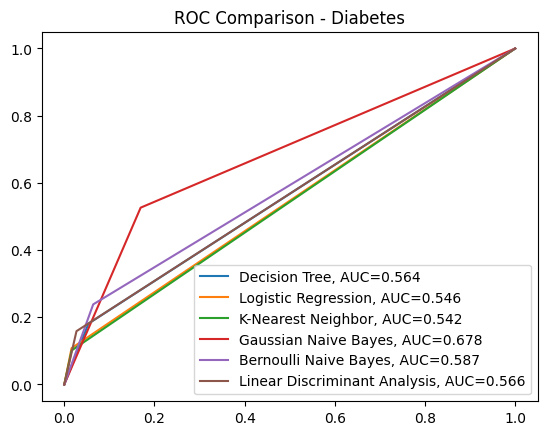

In [47]:

graph_roc_curves('ROC Comparison - Diabetes', roc_2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

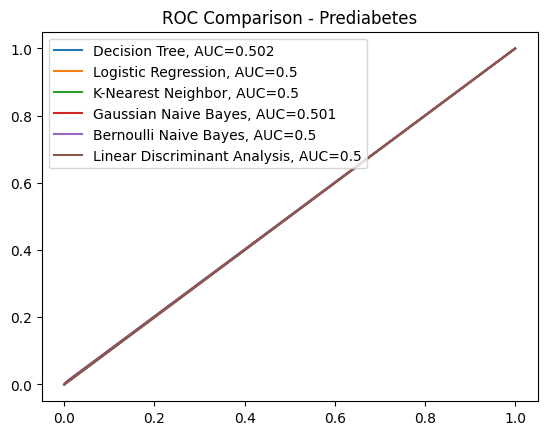

In [48]:
results_3 = []
roc_3 = {}

for i in range(len(names)):
    eval_model(
        names[i], 
        models[i], 
        results_3, 
        roc_3, 
        'prediabetes', 
        showConfusionMatrix=False
    )

graph_roc_curves('ROC Comparison - Prediabetes', roc_3)

In [18]:
# Comparison of score means and standard deviation 
# create table comparing average and std of multiple dataframes
def comparison_table(dfs, columns):
    meanScores = pd.concat(
        [df.mean() for df in dfs], 
        axis=1)
    meanScores.columns = [col for col in columns]

    stdScores = pd.concat(
        [df.std() for df in dfs], 
        axis=1)
    stdScores.columns = [col for col in columns]

    comparison = pd.concat([meanScores, stdScores], ignore_index=True)
    comparison.index = ['Mean', 'Stardard Dev.']
    return comparison
    
def cross_val(names, estimators, numfolds):

    cross_results = []

    for estimator in estimators: 
        cross_val = model_selection.cross_val_score(
            estimator, 
            predictors, 
            target, 
            cv = numfolds,
            scoring='accuracy'
        )
        cross_results.append(pd.DataFrame(cross_val))

    return comparison_table(cross_results, names)

In [36]:
# using names from

estimators = [ 
    tree.DecisionTreeClassifier(criterion='gini'),
    linear_model.LogisticRegression(solver='saga', penalty=None, max_iter=500),
    neighbors.KNeighborsClassifier(
        n_neighbors=25,
        metric='euclidean'),
    naive_bayes.GaussianNB(), 
    naive_bayes.BernoulliNB(),
    LinearDiscriminantAnalysis()
]

cross_val(names, estimators, 10).T

TypeError: 'numpy.ndarray' object is not callable

In [34]:
# Comparison of score means and standard deviation 
# create table comparing average and std of multiple dataframes
def comparison_table(dfs, columns):
    meanScores = pd.concat(
        [df.mean() for df in dfs], 
        axis=1)
    meanScores.columns = [col for col in columns]

    stdScores = pd.concat(
        [df.std() for df in dfs], 
        axis=1)
    stdScores.columns = [col for col in columns]

    comparison = pd.concat([meanScores, stdScores], ignore_index=True)
    comparison.index = ['Mean', 'Stardard Dev.']
    return comparison
    
def cross_val_precision(names, estimators, numfolds, classification):

    cross_results = []
    target_binarized = label_binarizer.transform(target)

    for estimator in estimators: 
        cross_val = model_selection.cross_val_score(
            estimator, 
            predictors, 
            target_binarized[:, class_code[classification]], 
            cv = numfolds,
            scoring='precision'
        )
        cross_results.append(pd.DataFrame(cross_val))

    return comparison_table(cross_results, names)

In [35]:
print('No Diabetes Precision')
cross_val_precision(names, estimators, 10, 'no diabetes').T

No Diabetes Precision


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

,Mean,Stardard Dev.
Decision Tree,0.648552,0.033177
Logistic Regression,0.718781,0.006498
K-Nearest Neighbor,0.717851,0.004760
Gaussian Naive Bayes,0.857199,0.019546
Bernoulli Naive Bayes,0.727675,0.006243
Linear Discriminant Analysis,0.715349,0.005675


In [37]:
print('Prediabetes Precision')
cross_val_precision(names, estimators, 10, 'prediabetes').T

Prediabetes Precision


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division`

,Mean,Stardard Dev.
Decision Tree,0.010096,0.004894
Logistic Regression,0.000000,0.000000
K-Nearest Neighbor,0.000000,0.000000
Gaussian Naive Bayes,0.298856,0.399244
Bernoulli Naive Bayes,0.000000,0.000000
Linear Discriminant Analysis,0.000000,0.000000


## Look at people who are 45 years of age or older 

In [20]:
# get subset of datapoints 45 age or older, >=6 on the scale

older45 = data[data['Age'] >= 6]
older45.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0


In [21]:
# specify target and features 
target = np.array(older45['Diabetes_012'])

features_df = older45.drop(columns='Diabetes_012', axis=0)
predictors = features_df.values
features_names = features_df.columns

# dataset breakdown 
print('No Diabetes:', round(np.array([1 if x ==0 else 0 for x in target]).sum()/len(target)*100, 1), '%')
print('Prediabetes:', round(np.array([1 if x ==1 else 0 for x in target]).sum()/len(target)*100, 1), '%')
print('Diabetes:', round(np.array([1 if x ==2 else 0 for x in target]).sum()/len(target)*100, 1), '%')

# split data into test and training sets 
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    predictors, 
    target, 
    test_size = 0.33, 
    random_state=2, 
    stratify=target
    )

label_binarizer = preprocessing.LabelBinarizer().fit(y_train)
class_code =  {
    'no diabetes' : 0, 
    'prediabetes' : 1,
    'diabetes' : 2
}

No Diabetes: 81.3 %
Prediabetes: 2.1 %
Diabetes: 16.6 %


In [22]:
names = [ 
    'Decision Tree',
    'Logistic Regression',
    'K-Nearest Neighbor',
    'Naive Bayes', 
    'Linear Discriminant Analysis'
]

models= [ 
    tree.DecisionTreeClassifier(criterion='gini').fit(x_train, y_train),
    linear_model.LogisticRegression(penalty='l2').fit(x_train, y_train),
    neighbors.KNeighborsClassifier(
        n_neighbors=10,
        metric='euclidean').fit(x_train, y_train),
    naive_bayes.GaussianNB().fit(x_train, y_train), 
    LinearDiscriminantAnalysis().fit(x_train, y_train)
]

results_3 = {}
roc_3 = {}

for i in range(len(names)):
    eval_model(
        names[i], 
        models[i], 
        results_3, 
        roc_3, 
        'diabetes', 
        showConfusionMatrix=False
    )

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'dict' object has no attribute 'append'

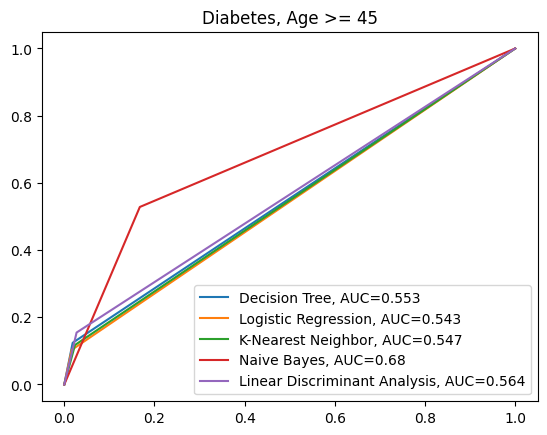

In [ ]:
graph_roc_curves('Diabetes, Age >= 45', roc_2)

In [ ]:
## 
# Comparison of score means and standard deviation 
# create table comparing average and std of multiple dataframes
def comparison_table(dfs, columns):
    meanScores = pd.concat(
        [df.mean() for df in dfs], 
        axis=1)
    meanScores.columns = [col for col in columns]

    stdScores = pd.concat(
        [df.std() for df in dfs], 
        axis=1)
    stdScores.columns = [col for col in columns]

    comparison = pd.concat([meanScores, stdScores], ignore_index=True)
    comparison.index = ['Mean', 'Stardard Dev.']
    return comparison
    
def cross_val(names, estimators, numfolds):

    cross_results = []

    for estimator in estimators: 
        cross_val = model_selection.cross_val_score(
            estimator, 
            predictors, 
            target, 
            cv = numfolds,
            scoring='accuracy'
        )
        cross_results.append(pd.DataFrame(cross_val))

    return comparison_table(cross_results, names).T.round(3)

In [ ]:
cross_val(names, estimators, 10)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

,Mean,Stardard Dev.
Decision Tree,0.816,0.002
Logistic Regression,0.816,0.004
K-Nearest Neighbor,0.814,0.003
Naive Bayes,0.742,0.008
Linear Discriminant Analysis,0.815,0.004


# dropping duplicates from dataset 

In [28]:
nodups = data.drop_duplicates()

# specify target and features 
target = np.array(nodups['Diabetes_012'])

features_df = nodups.drop(columns='Diabetes_012', axis=0)
predictors = features_df.values
features_names = features_df.columns

# dataset breakdown 
print('No Diabetes:', round(np.array([1 if x ==0 else 0 for x in target]).sum()/len(target)*100, 1), '%')
print('Prediabetes:', round(np.array([1 if x ==1 else 0 for x in target]).sum()/len(target)*100, 1), '%')
print('Diabetes:', round(np.array([1 if x ==2 else 0 for x in target]).sum()/len(target)*100, 1), '%')

# split data into test and training sets 
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    predictors, 
    target, 
    test_size = 0.33, 
    random_state=2, 
    stratify=target
    )

label_binarizer = preprocessing.LabelBinarizer().fit(y_train)
class_code =  {
    'no diabetes' : 0, 
    'prediabetes' : 1,
    'diabetes' : 2
}

No Diabetes: 68.7 %
Prediabetes: 5.1 %
Diabetes: 26.2 %


In [29]:
names = [ 
    'Decision Tree',
    'Logistic Regression',
    'K-Nearest Neighbor',
    'Gaussian Naive Bayes', 
    'Bernoulli Naive Bayes', 
    'Linear Discriminant Analysis'
]

models= [ 
    tree.DecisionTreeClassifier(criterion='gini').fit(x_train, y_train),
    linear_model.LogisticRegression(solver='saga', penalty=None).fit(x_train, y_train),
    neighbors.KNeighborsClassifier(
        n_neighbors=25,
        metric='euclidean').fit(x_train, y_train),
    naive_bayes.GaussianNB().fit(x_train, y_train), 
    naive_bayes.BernoulliNB().fit(x_train, y_train),
    LinearDiscriminantAnalysis().fit(x_train, y_train)
]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

,name,Train acc,Test acc,Prec
0,Decision Tree,0.856410,0.504752,[0.65362225 0.01382778 0.18335226]
1,Logistic Regression,0.689865,0.690109,[0.70594271 0. 0.49123711]
2,K-Nearest Neighbor,0.702784,0.678666,[0.70426536 0. 0.42018581]
3,Gaussian Naive Bayes,0.558558,0.563978,[0.84042937 0. 0.36261498]
4,Bernoulli Naive Bayes,0.677713,0.679579,[0.71265466 0. 0.4466524 ]
5,Linear Discriminant Analysis,0.690202,0.691135,[0.70397009 0. 0.50500884]


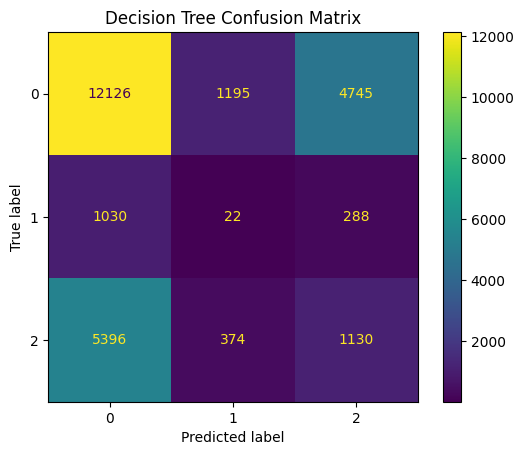

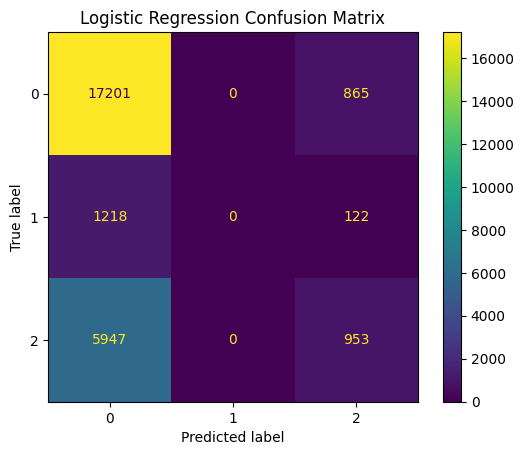

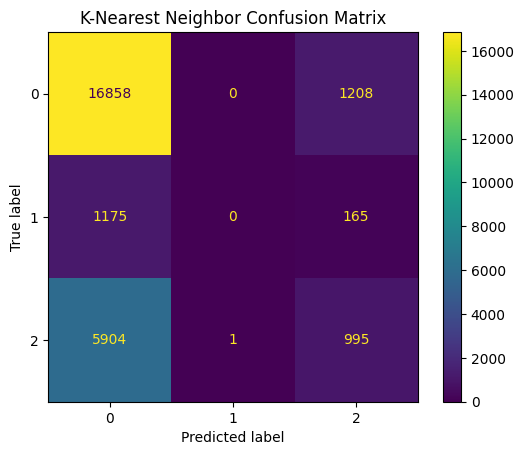

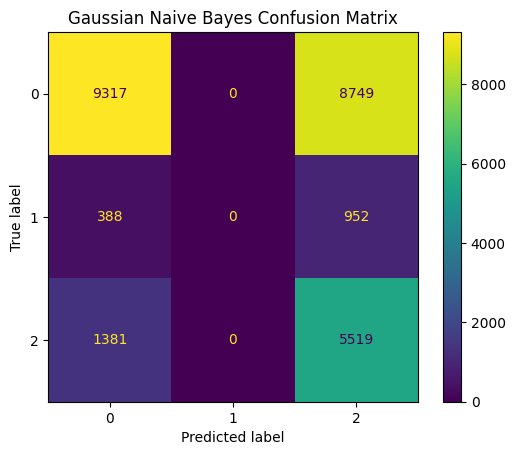

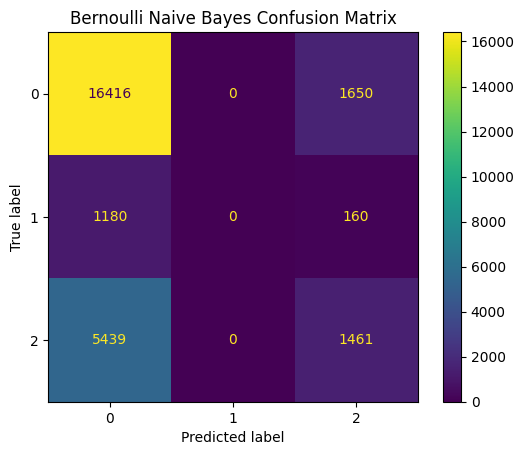

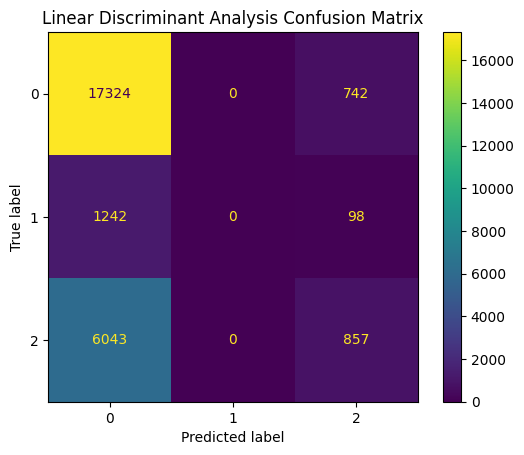

In [30]:
results_4 = []
roc_4 = {}

for i in range(len(names)):
    eval_model(
        names[i], 
        models[i], 
        results_4, 
        roc_4, 
        'prediabetes', 
        showConfusionMatrix=True
    )

diabetes = pd.DataFrame(results_4)
diabetes

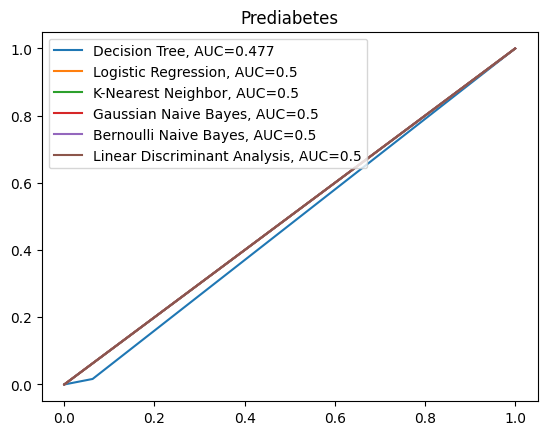

In [31]:
graph_roc_curves('Prediabetes', roc_4)